# Some graphical representations of data pertaining to Covid-19
data from https://ourworldindata.org/

In [2]:
import plotly.graph_objs as go 
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_excel('covid_data_28_April_2020.xlsx')
#https://ourworldindata.org/

In [5]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million
0,ABW,Aruba,2020-04-29,100,0,2,0,936.628,0.000,18.733
1,AFG,Afghanistan,2020-04-29,1827,124,60,3,46.932,3.185,1.541
2,AGO,Angola,2020-04-29,27,0,2,0,0.822,0.000,0.061
3,AIA,Anguilla,2020-04-29,3,0,0,0,199.973,0.000,0.000
4,ALB,Albania,2020-04-29,750,14,30,2,260.616,4.865,10.425


In [8]:
data = dict(
        type = 'choropleth',
        colorscale = 'viridis',
        reversescale = True,
        locations = df['location'],
        locationmode = "country names",
        z = df['total_cases_per_million'],
        text = df['location'],
        colorbar = {'title' : 'total_cases_per_million'},
      ) 


In [9]:
layout = dict(title = 'Covid-19 April 28 2020 Total Cases per Million data from https://ourworldindata.org/ *San Marino and the Vatican have been excl.',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

In [10]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [11]:
data = dict(
        type = 'choropleth',
        colorscale = 'blackbody',
        reversescale = True,
        locations = df['location'],
        locationmode = "country names",
        z = df['total_deaths'],
        text = df['location'],
        colorbar = {'title' : 'Total Deaths'},
      ) 


In [12]:
layout = dict(title = 'Covid-19 April 28 2020 deaths data from https://ourworldindata.org/ *San Marino and the Vatican have been excl.',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

In [13]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

In [14]:
color=["#980505","#CD1212","#D84E4E","#CB6262","#D39B5F","#F7EC10","#D0F710","#9CF710","#B4D67F","#969C8E"]

In [15]:
#creating a stacked histogram with from the top 10 countries with 
#the number of cases and the total number of deaths

In [16]:
# sort values by total cases in ascending order (= False to reverse it)
orderd_df = df.sort_values('total_cases', ascending=False).head(10)
orderd_df

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million
192,USA,United States,2020-04-29,1012583,24132,58355,2110,3059.139,72.906,176.298
58,ESP,Spain,2020-04-29,212917,2144,24275,453,4553.908,45.856,519.198
94,ITA,Italy,2020-04-29,201505,2091,27359,382,3332.764,34.584,452.500
67,GBR,United Kingdom,2020-04-29,161145,3996,21678,586,2373.759,58.863,319.329
48,DEU,Germany,2020-04-29,157641,1304,6115,202,1881.518,15.564,72.985
64,FRA,France,2020-04-29,126835,1065,23660,367,1943.131,16.316,362.475
186,TUR,Turkey,2020-04-29,114653,2392,2992,92,1359.429,28.362,35.476
159,RUS,Russia,2020-04-29,93558,6411,867,72,641.096,43.931,5.941
90,IRN,Iran,2020-04-29,92584,1112,5877,71,1102.283,13.239,69.970
35,CHN,China,2020-04-29,83940,2,4637,0,58.319,0.001,3.222


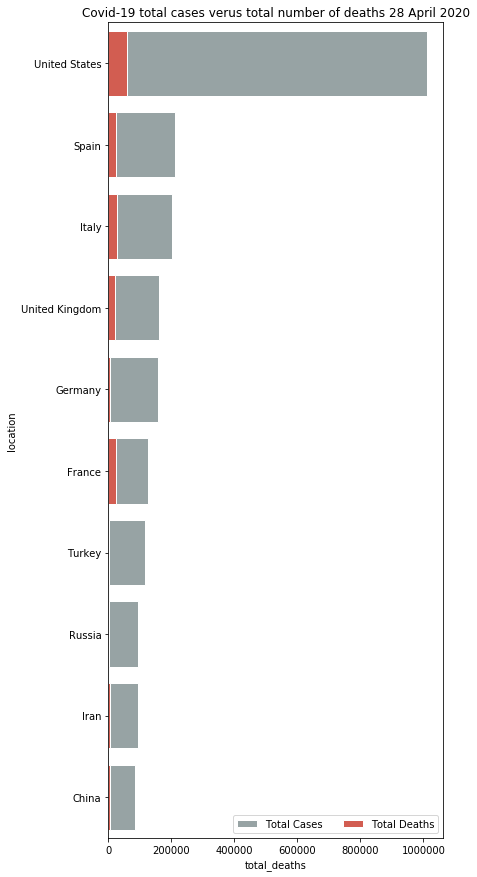

In [17]:
f,ax = plt.subplots(figsize = (6,15))
sns.barplot(x = 'total_cases',
            y = 'location',
           data = orderd_df,
           label = 'Total Cases',
           color = "#95a5a6",
            edgecolor = 'w')
sns.barplot(x = 'total_deaths',
            y = 'location',
           data = orderd_df,
           label = 'Total Deaths',
           color = "#e74c3c",
           edgecolor = 'w')
ax.legend(ncol = 2, loc = 'best')
plt.title('Covid-19 total cases verus total number of deaths 28 April 2020')
plt.show()

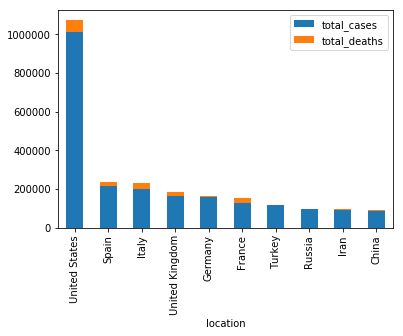

In [18]:
orderd_df = df.sort_values('total_cases', ascending=False).head(10)
stacked_df = orderd_df[['location','total_cases','total_deaths']]
stacked_df.plot.bar(x= 'location',stacked=True)

In [165]:
#using plotly

fig = go.Figure(go.Bar(x=orderd_df['location'], y=orderd_df['total_cases'], name='Total cases'))
fig.add_trace(go.Bar(x=orderd_df['location'], y = orderd_df['total_deaths'], name='Total deaths'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()